#Intro

First off. This was a spontaneous reboot of the assignment, after the Google Revenue dataset proved too big. Sorry for the lack of discovery and refinement. We'll go into what should have been done better.

We're working on a labeled dataset, where the goal is to find *one* value per entry: The predicted revenue. Hence, this is a supervised linear regression project.

The aim of this project is to create a lightweight model, suitable for web deployment. This means that the data will have to be converted into as lightweigh datatypes as possible, and as much unnecessary information trimmed away. However, one thing to notice, is that a lot of the information entered here is dicts, and not JSON objects. This is one of the main differences in comparison to the Google project. We solve this by creating dummies. However, doing so, we limit future data predictions to some predefinations, like a certain set of languages the model is trained to detect.

Another discovery is that a lot of the training data had a lot of missing information. Budget being one of the major ones, and also one of the most correlating factors. One could assume there were small independent film makers making movies on the free time with whatever they had available for free. However, many of these proved productions from major studios, that simply had missing- or wrong data.

In [367]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import json
from pandas.io.json import json_normalize

In [368]:
typeDetermination = {}
columnFiltering = ["id", "budget", "homepage", "imdb_id", "original_language", "original_title", "overview", "popularity", "release_date", "runtime", "status", "tagline", "title", "revenue"]

train = pd.read_csv("train.csv")#, usecols = columnFiltering)
train.head()

#train = pd.read_csv('train.csv', dtype = typeDetermination, usecols = columnFiltering)
#train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [369]:
test = pd.read_csv("test.csv")
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [370]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [371]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [372]:
test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [373]:
train.isna().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
original_language           0
budget                      0
imdb_id                     0
revenue                     0
original_title              0
popularity                  0
release_date                0
status                      0
title                       0
id                          0
dtype: int64

In [374]:
test.isna().sum().sort_values(ascending=False)

belongs_to_collection    3521
homepage                 2978
tagline                   863
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22
genres                     16
overview                   14
cast                       13
runtime                     4
title                       3
status                      2
poster_path                 1
release_date                1
original_language           0
imdb_id                     0
original_title              0
popularity                  0
budget                      0
id                          0
dtype: int64

#Cleaning and Preparation

In [375]:
print ("Collections")
print (train["belongs_to_collection"][:3])

print ("\nHomepages")
print (train["homepage"][:3])

print ("\nTaglines")
print (train["tagline"][:3])

print ("\nKeywords")
print (train["Keywords"][:3])

print ("\nProd. companies")
print (train["production_companies"][:3])

print ("\nProd. countries")
print (train["production_countries"][:3])

Collections
0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
Name: belongs_to_collection, dtype: object

Homepages
0                                  NaN
1                                  NaN
2    http://sonyclassics.com/whiplash/
Name: homepage, dtype: object

Taglines
0    The Laws of Space and Time are About to be Vio...
1    It can take a lifetime to find true love; she'...
2      The road to greatness can take you to the edge.
Name: tagline, dtype: object

Keywords
0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
Name: Keywords, dtype: object

Prod. companies
0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
Name: production_companies, dty

In [376]:
 dropping = ["belongs_to_collection", "homepage", "tagline"]

# Note to self: Double check other columns with a lot of text, and values that are hard to compare at a later stage.

train.drop(dropping, axis = 1, inplace = True)
test.drop(dropping, axis = 1, inplace = True)

train.dropna(inplace = True)
test.dropna(inplace = True)

# train.info shows previous amount of columns

print(train.shape)
print(test.shape)

(2606, 20)
(3814, 19)


In the following output, we see that the amount of movies where runtime equals 0 is low, and we drop them. However, the amount where budget equals 0 is high, and we have to do something different about it.

In [377]:
print("Number of runtime = 0 in train:", len(train[train['runtime']==0]))
print("Number of runtime = 0 in test:", len(test[test['runtime']==0]))

print("Number of budget = 0 in train:", len(train[train['budget']==0]))
print("Number of budget = 0 in test:", len(test[test['budget']==0]))

Number of runtime = 0 in train: 2
Number of runtime = 0 in test: 0
Number of budget = 0 in train: 614
Number of budget = 0 in test: 923


In [378]:
train = train[train.runtime != 0]
train.shape

(2604, 20)

We've now cleaned out columns with a significant amount of missing values, as well as rows with missing values. We double check this with the following:

In [379]:
print ("Train is N/A:")
print (train.isna().sum().sort_values(ascending=False))
print ("\nTest is N/A:")
print (test.isna().sum().sort_values(ascending=False))

Train is N/A:
revenue                 0
crew                    0
budget                  0
genres                  0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
title                   0
Keywords                0
cast                    0
id                      0
dtype: int64

Test is N/A:
crew                    0
poster_path             0
budget                  0
genres                  0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
cast                    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
title                  

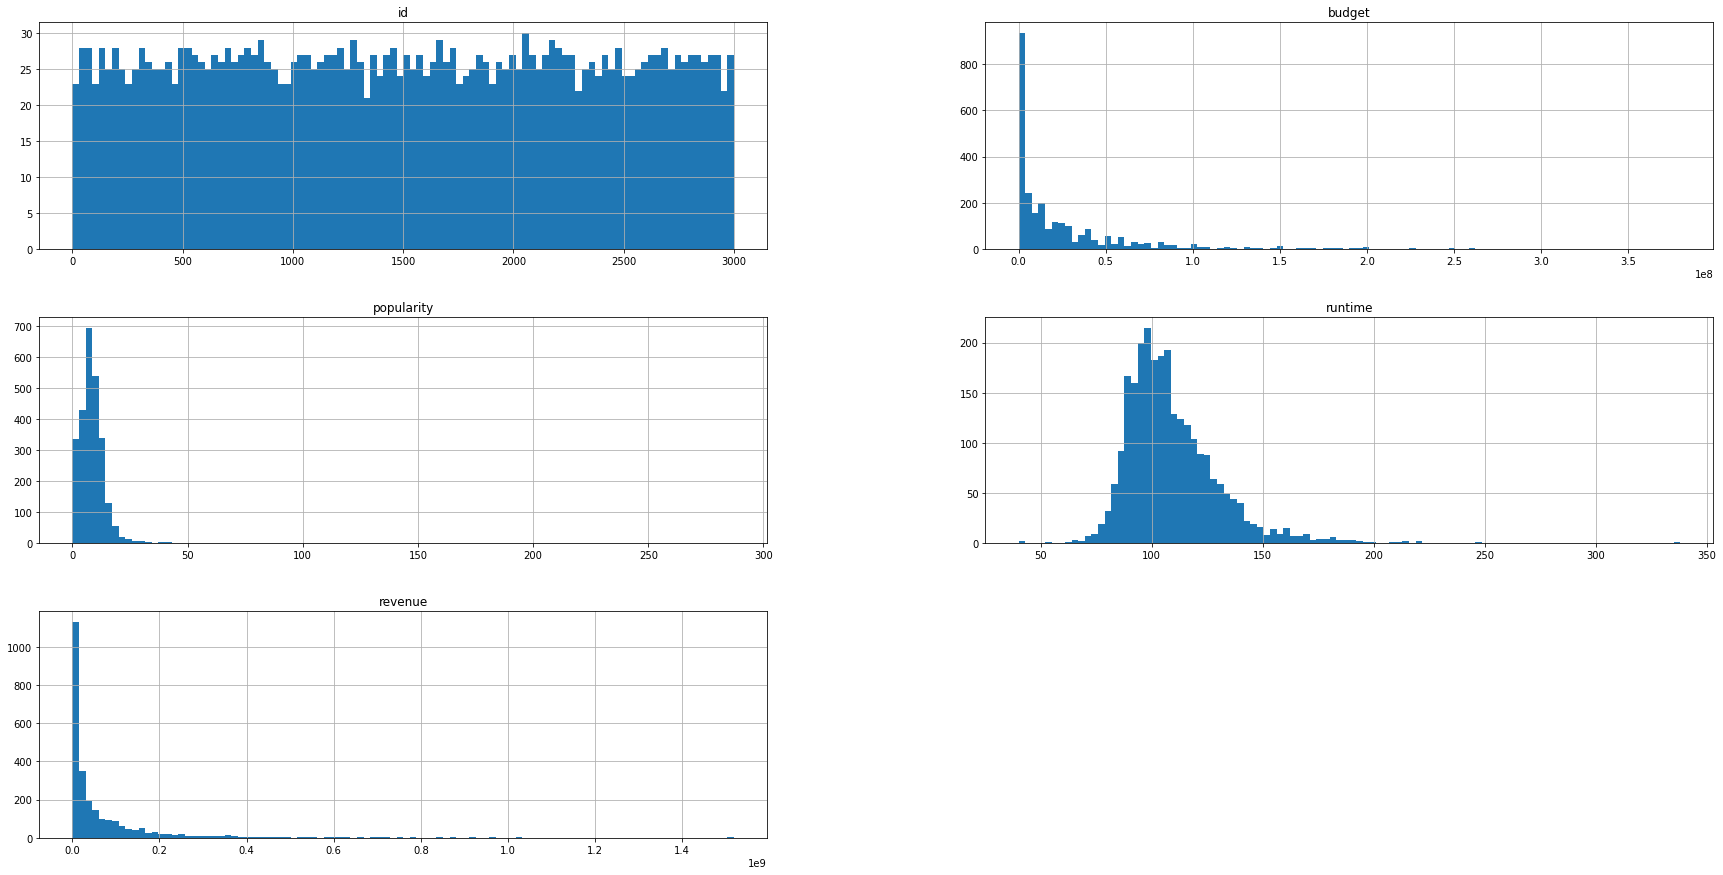

In [380]:
%matplotlib inline

train.hist(bins=100, figsize=(30,15))
plt.show()

Including the status of a movie here is a bit strange, especially when it is rumored. Evidently, there is a rumored movie with a revenue, as we can see in the following two code blocks.

In [381]:
print ("Counts of release status:")
print (train["status"].value_counts())

print ("\nRevenue for movies with status Rumored:")
print (train["revenue"][train['status'] == "Rumored"])

#Looking for more categories for similar investigation:
print ("\nCount of unique values in other categories:")
train.nunique()

Counts of release status:
Released    2603
Rumored        1
Name: status, dtype: int64

Revenue for movies with status Rumored:
1216    13418091
Name: revenue, dtype: int64

Count of unique values in other categories:


id                      2604
budget                   366
genres                   803
imdb_id                 2604
original_language         32
original_title          2582
overview                2604
popularity              2604
poster_path             2604
production_companies    2188
production_countries     292
release_date            2153
runtime                  133
spoken_languages         370
status                     2
title                   2578
Keywords                2548
cast                    2602
crew                    2604
revenue                 2496
dtype: int64

In [382]:
# Drop early to increase performance and readability

# Notes:
# Poster path converted to boolean gave NaN in correlation. Hence dropped. Data gathering is also poor on this category, and it had very little, if any affect on the result.

dropCols = ["id", "imdb_id", "original_title", "overview", "production_companies", "production_countries", "spoken_languages", "status", "title", "Keywords", "cast", "crew", "poster_path"]

train.drop(dropCols, axis = 1, inplace = True)
test.drop(dropCols, axis = 1, inplace = True)

train = train.replace({"'": ""}, regex = True)
test = test.replace({"'": ""}, regex = True)
train = train.replace({'"': ""}, regex = True)
test = test.replace({'"': ""}, regex = True)

#.replace({';':''}, regex=True)

# Generate an example csv for understanding how to set up the deployment website
#train.head(5).to_csv("example.csv")

train.head(1)

,budget,genres,original_language,popularity,release_date,runtime,revenue
0,14000000,"[{id: 35, name: Comedy}]",en,6.575393,2/20/15,93.0,12314651


In [383]:
#We see that has a correlation. It shouldn't be considered, as it's only a means of organizing data.
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.744580
popularity    0.451975
runtime       0.207573
Name: revenue, dtype: float64

In the following graphs, we see that there is some correlation in the data. However, there are outlayers that makes the graphs significantly harder to get a good reading on. An example is are the outlayers in popularity, where a wast majority is centered roughly around 25, while a few jump as high as around 300, skewing the whole graph. This may make the correlation look a lot stronger than it shoud.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f218cc82610>,
      dtype=object)

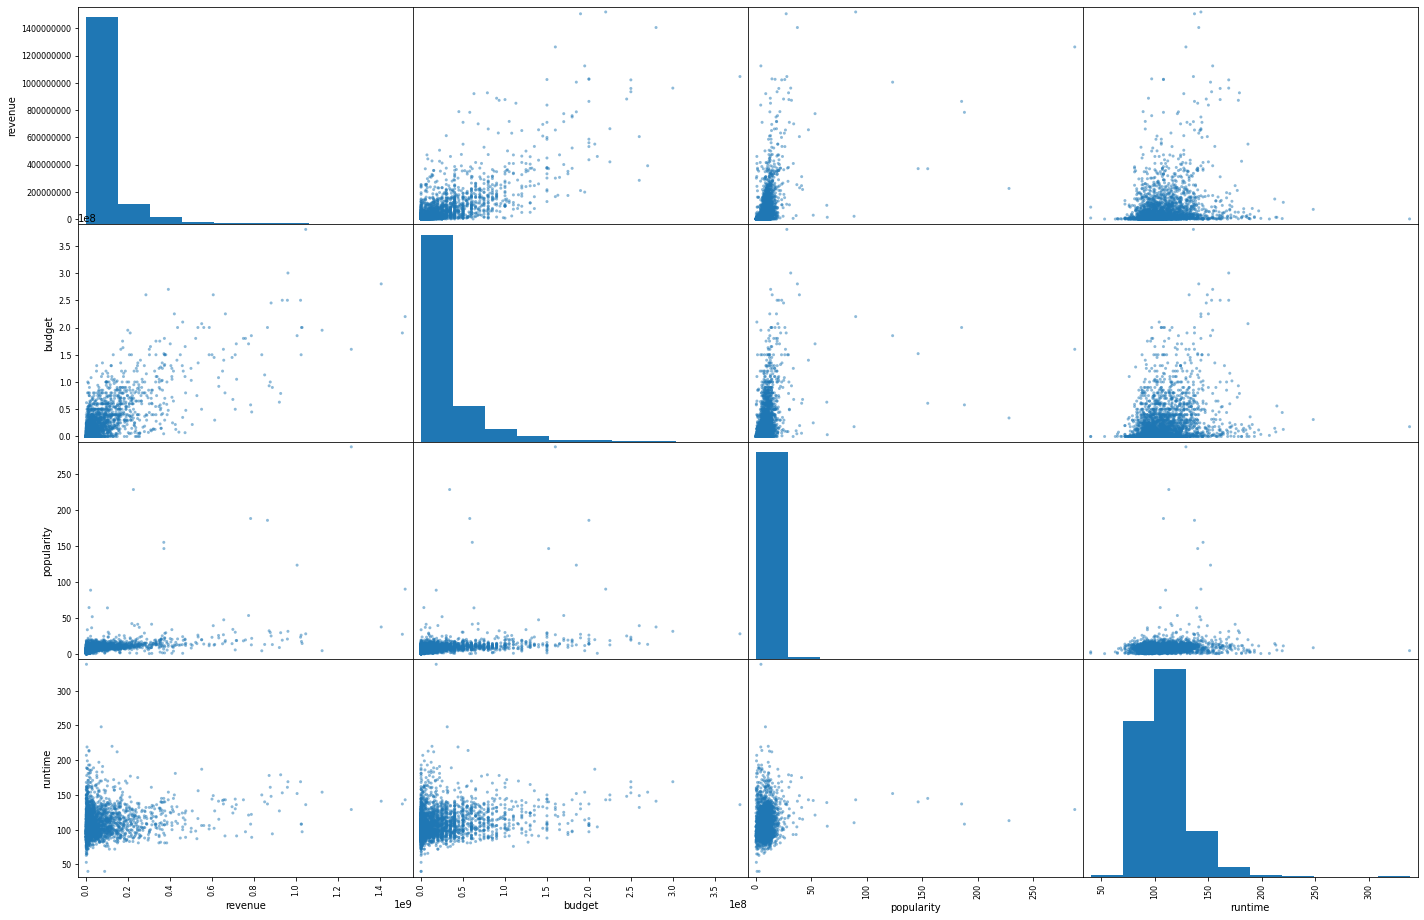

In [384]:
attributes = ["revenue", "budget", "popularity", "runtime"]

pd.plotting.scatter_matrix(train[attributes], figsize=(24,16))

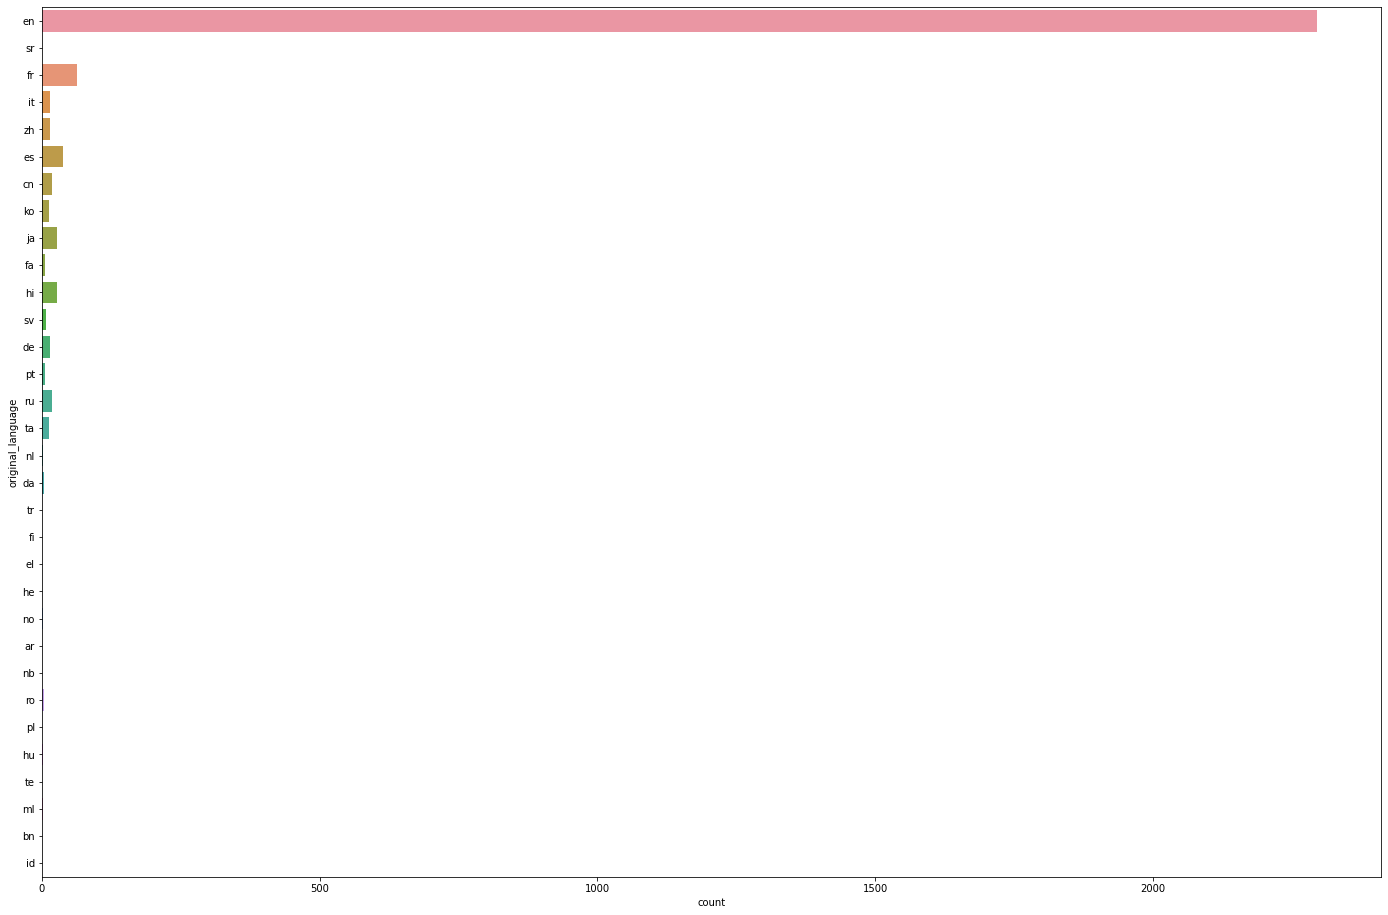

In [385]:
# Note to self: Most movies are in English. Does this affect the revenue, and is the sample size significant enough to make any good prediction based on language?
# This may make movies like "Parasite" or series like "Squid Games" outliers.

plt.figure(figsize=(24,16))
sns.countplot(y="original_language", data=train)

In [386]:
from datetime import datetime

def add_calendar(data = None):
  #dt = datetime.strptime(data["release_date"], '%d/%d/%Y')
  #weekday = dt.weekday() + 1

  #data["release_day"] = dt.day
  #data["release_weekday"] = weekday
  #data["release_month"] = dt.month
  #data["release_year"] = dt.year

  data["release_date"] = pd.to_datetime(data["release_date"], infer_datetime_format=True)
  data["release_day"] = data["release_date"].apply(lambda d: d.day)
  data["release_weekday"] = data["release_date"].apply(lambda d: d.weekday())
  data["release_month"] = data["release_date"].apply(lambda d: d.month)
  data["release_year"] = data["release_date"].apply(lambda d: d.year if d.year < 2021 else d.year -100)
  data.drop(["release_date"], axis = 1, inplace = True)

In [387]:
add_calendar(train)
train.head(2)

,budget,genres,original_language,popularity,runtime,revenue,release_day,release_weekday,release_month,release_year
0,14000000,"[{id: 35, name: Comedy}]",en,6.575393,93.0,12314651,20,4,2,2015
1,40000000,"[{id: 35, name: Comedy}, {id: 18, name: Drama}...",en,8.248895,113.0,95149435,6,4,8,2004


In [388]:
add_calendar(test)
test.head(2)

,budget,genres,original_language,popularity,runtime,release_day,release_weekday,release_month,release_year
1,88000,"[{id: 27, name: Horror}, {id: 878, name: Scien...",en,3.559789,65.0,19,6,5,1958
2,0,"[{id: 35, name: Comedy}, {id: 10749, name: Rom...",en,8.085194,100.0,23,4,5,1997


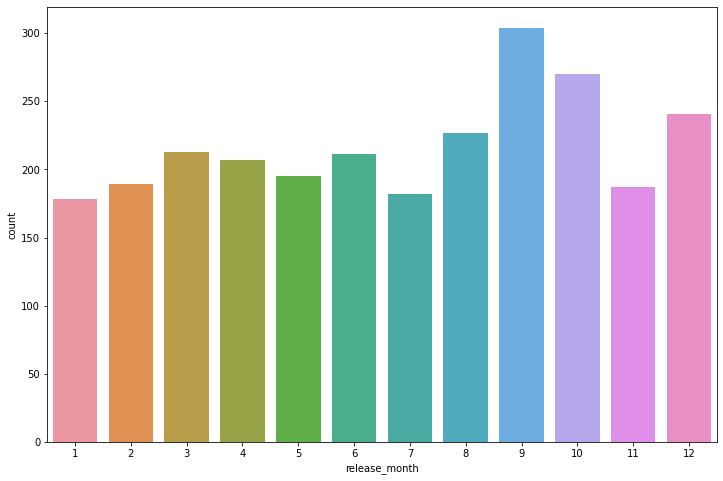

In [389]:
plt.figure(figsize=(12,8))
sns.countplot(x='release_month',data=train)

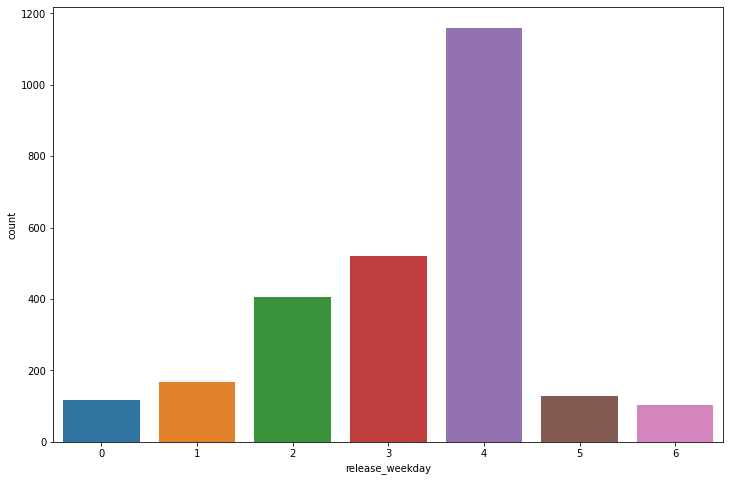

In [390]:
plt.figure(figsize=(12,8))
sns.countplot(x="release_weekday",data=train)

In the two last graphs, we see that month and weekday may have a big significance that needs to be entered in the model.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text major ticklabel objects>)

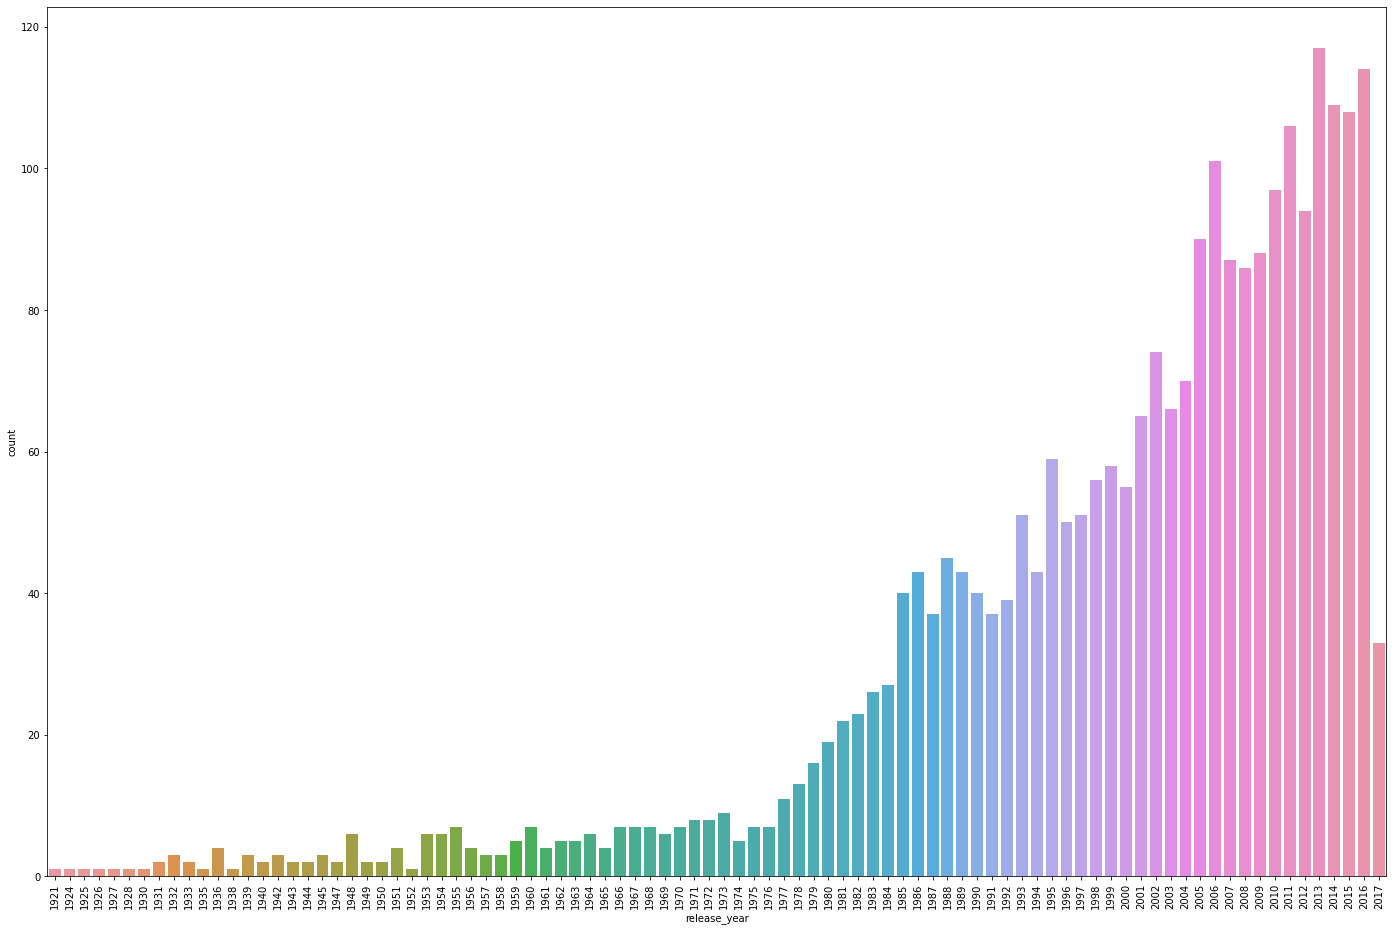

In [391]:
plt.figure(figsize=(24,16))
sns.countplot(x='release_year',data=train)
plt.xticks(rotation=90)

In [392]:
train[train.budget == 0].head()

# indekser på disse er f.eks. 8, 11, 17, 22.

,budget,genres,original_language,popularity,runtime,revenue,release_day,release_weekday,release_month,release_year
8,0,"[{id: 28, name: Action}, {id: 35, name: Comedy...",en,6.902423,100.0,34327391,16,4,2,1996
11,0,"[{id: 35, name: Comedy}]",en,10.543750,98.0,22642033,10,4,7,1987
17,0,"[{id: 18, name: Drama}, {id: 10749, name: Roma...",en,4.183558,111.0,1234254,25,2,12,2013
22,0,"[{id: 53, name: Thriller}, {id: 27, name: Horr...",en,7.820787,116.0,100345,28,5,7,2012
24,0,"[{id: 27, name: Horror}, {id: 35, name: Comedy}]",en,7.434577,87.0,4947717,9,5,9,2006


The following code fills budgets where the value is 0 with something more realistic. As we've seen in the graph above that movies are released over several decades, we need to take inflation into consideration. Therefore we first collect movies where the budget is not 0. This is done to avoid doing something like interpolating between two 0-values. Then we group the non-zeros by year to take a mean from each grouped year.

The main data that we want to continue working on then has the mean values applied to it. This is not good for the accuracy in the model, but it's one of the better alternatives to just deleting the data, ending up with a dataset that is so small that it will again affect the training negatively.

In [393]:
from collections import defaultdict

# Becasue there are so many entries without a budget, we save the data.
def fill_budget(data):
  defEd = defaultdict()

  notZeros = data[data["budget"] != 0]
  
  year_mean = pd.Series(notZeros.groupby(["release_year"])["budget"].agg("mean"))
  defEd = dict(year_mean)
  
  for i in data[data["budget"] == 0]:
    data["budget"] = data.loc[:, "release_year"].map(defEd)

  # Replace possible NaN with 0
  print ("NaN-values in budget left to be 0'ed:",data["budget"].isna().sum())
  data.budget = data["budget"].ffill(0)
    
  return data

train = fill_budget(train)
test = fill_budget(test)

print (len(train[train['budget']==0]))
print (len(test[test['budget']==0]))

NaN-values in budget left to be 0'ed: 6
NaN-values in budget left to be 0'ed: 1
0
0


In [394]:
train.head()
train.shape

(2604, 10)

###Dict conversion

In [395]:
def convert_dicts(data = None):
  #Genres
  genres = data.genres.str.get_dummies(sep = ',')
  data = pd.concat([data, genres], axis = 1)
  data.drop(["genres"], axis = 1, inplace = True)

  #Original language
  lang = pd.get_dummies(data["original_language"])
  data.drop(["original_language"], axis = 1, inplace = True)

  data = pd.concat([data, lang], axis = 1)
  
  return data

#train = convert_dicts(train)
#test = convert_dicts(test)

# When conversion disabled, remove the dicts:
train.drop(["genres"], axis = 1, inplace = True)
test.drop(["genres"], axis = 1, inplace = True)
train.drop(["original_language"], axis = 1, inplace = True)
test.drop(["original_language"], axis = 1, inplace = True)

In [396]:
train.head(1)

,budget,popularity,runtime,revenue,release_day,release_weekday,release_month,release_year
0,4.818330e+07,6.575393,93.0,12314651,20,4,2,2015


In [397]:
print (train.shape)
print (test.shape)

(2604, 8)
(3814, 7)


In [398]:
train.head(1)

,budget,popularity,runtime,revenue,release_day,release_weekday,release_month,release_year
0,4.818330e+07,6.575393,93.0,12314651,20,4,2,2015


In [399]:
test.head(1)

,budget,popularity,runtime,release_day,release_weekday,release_month,release_year
1,2479200.0,3.559789,65.0,19,6,5,1958


In [400]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue            1.000000
popularity         0.451975
runtime            0.207573
budget             0.164108
release_year       0.153703
release_day        0.037747
release_month      0.020302
release_weekday   -0.135270
Name: revenue, dtype: float64

#Training Model and Predictions

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn import metrics

In [402]:
X = train.drop(["revenue"], axis = 1)
y = train["revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(2083, 7)
(2083,)
(521, 7)
(521,)


In [403]:
y_train.head()

553     11081586
2710     3100000
2520    90614445
1575    11582891
2090          18
Name: revenue, dtype: int64

In [404]:
# Generate an example csv for understanding how to set up the deployment website
#X_train.head(5).to_csv("example.csv")
#X_train.head(1)

In [405]:
y_test.head()

2669    346079773
2782     77745568
221        754935
2831     19265302
1052     10541523
Name: revenue, dtype: int64

In [406]:
def rmsle(y_test, prediction):
  return np.sqrt(np.mean(np.square(np.log1p(prediction) - np.log1p(y_test))))

In [407]:
def print_mean_err(prediction = None):
  mae = metrics.mean_absolute_error(y_test, prediction)
  mse = metrics.mean_squared_error(y_test, prediction)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))

  print ("MAE:", mae)
  print ("MSE:", mse)
  print ("RMSE:", rmse)
  print ("RMSLE:", rmsle(y_test, prediction))

In [408]:
test_model = LinearRegression()
test_model.fit(X_train, y_train)
print_mean_err(test_model.predict(X_test))

MAE: 67440866.24816407
MSE: 1.3056624996522134e+16
RMSE: 114265589.73077649
RMSLE: 2.9805303332550115


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [409]:
model = LGBMRegressor(n_estimators=100)

model.fit(X_train,
            y_train,
            eval_set = [(X_test, y_test)],
            eval_metric = ["rmlsle", rmsle, False],
            verbose = False)

prediction = model.predict(X_test, num_iteration = model.best_iteration_)
print_mean_err (prediction)

MAE: 58821161.223189
MSE: 1.040187917271077e+16
RMSE: 101989603.25793394
RMSLE: 2.858211576664866


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [410]:
model.best_score_

defaultdict(dict, {})

In [411]:
model.feature_importances_

array([280, 869, 708, 327, 155, 318, 343])

In [412]:
import pickle

# Exporting test_model, as LGBMRegressor gave problems during deployment
with open("LR_Model", "wb") as file:
  pickle.dump(test_model, file)

#Conclusion

The result far off from where we want it to be. This is because the model doesn't get enough categories to work with. We also removed a catefory for the log of the revenue, because it creates a false accuracy. It relies on revenue, which will not be gathered for data to do predictions on. Another thing to note is that the budget entries were lacking, and the solution to fill it with the average of the year of release was just to save the data from being dropped, and have enough for the model to train on. We do therefore consider the data collection in the training set a bit lackluster.

With more time, cast and genres would be properly sorted as dummies. We suspect this would help a lot, although a big budget should imply a "good" cast.

Sidenote: We disabled the dummies to make the deployment work. The problem was that the deployed version made dataframes of wrong size for the model. The team is simply too overworked and/ or sick (literally) and tired to map things correctly. Sorry.

Extra conclusion: Dummies are possibly quite bad for further datagathering without properly set template.